In [27]:
#Neural Networks Assignment
# Name: THEEGALA VINIL
# Course: Data science
# Batch: 19th june
# ph: 8374512463

#Introduction of neural networks....!

---



Neural networks are a fundamental concept in the field of Artificial Intelligence (AI) and Machine Learning (ML). They are inspired by the biological neural systems in the human brain and are capable of learning complex relationships from data. Neural networks have become essential for solving problems in computer vision, natural language processing, speech recognition, and pattern classification.

In this assignment, I work with a dataset of handwritten letters to build a neural network model that can classify alphabets based on their features. The dataset consists of several numeric attributes such as width, height, on-pixel count, and geometric descriptors, with the target variable being the corresponding letter.

---



By completing this task, we gain practical experience in applying neural networks to real-world classification problems and learn how visualizations can enhance both understanding and presentation of results.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [3]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [5]:

# --- 2. Load Dataset ---
data = pd.read_csv("/content/Alphabets_data - Alphabets_data.csv")


In [7]:
# Quick overview
print("Dataset shape:", data.shape)
display(data.head())

Dataset shape: (20000, 17)


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
print("Columns in dataset:", data.columns.tolist())


Columns in dataset: ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']


In [12]:
X = data.drop("letter", axis=1).values
y = data["letter"].values


In [13]:

# --- 3. Basic Data Exploration ---
print("\nClass distribution:")
print(data['letter'].value_counts())





Class distribution:
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


/tmp/ipython-input-3926806675.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="letter", data=data, palette="viridis")


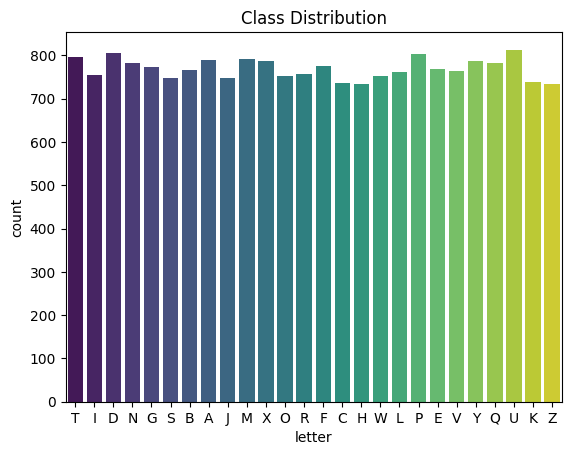

In [15]:
sns.countplot(x="letter", data=data, palette="viridis")
plt.title("Class Distribution")
plt.show()


In [16]:

# --- 4. Preprocessing ---
X = data.drop("letter", axis=1).values
y = data["letter"].values


In [17]:

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [18]:

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 16000
Testing samples: 4000


In [20]:

# --- 5. Build Neural Network Model ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [22]:
# --- 6. Train Model ---
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2468 - loss: 2.6427 - val_accuracy: 0.6787 - val_loss: 1.1859
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5877 - loss: 1.3291 - val_accuracy: 0.7416 - val_loss: 0.9048
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6466 - loss: 1.1062 - val_accuracy: 0.7775 - val_loss: 0.7778
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7019 - loss: 0.9561 - val_accuracy: 0.8025 - val_loss: 0.6877
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7215 - loss: 0.8725 - val_accuracy: 0.8150 - val_loss: 0.6292
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7444 - loss: 0.8035 - val_accuracy: 0.8300 - val_loss: 0.5823
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7574 - loss: 0.7654 - val_accuracy: 0.8397 - val_loss: 0.5365
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7645 - loss: 0.7357 - val_accuracy: 0.

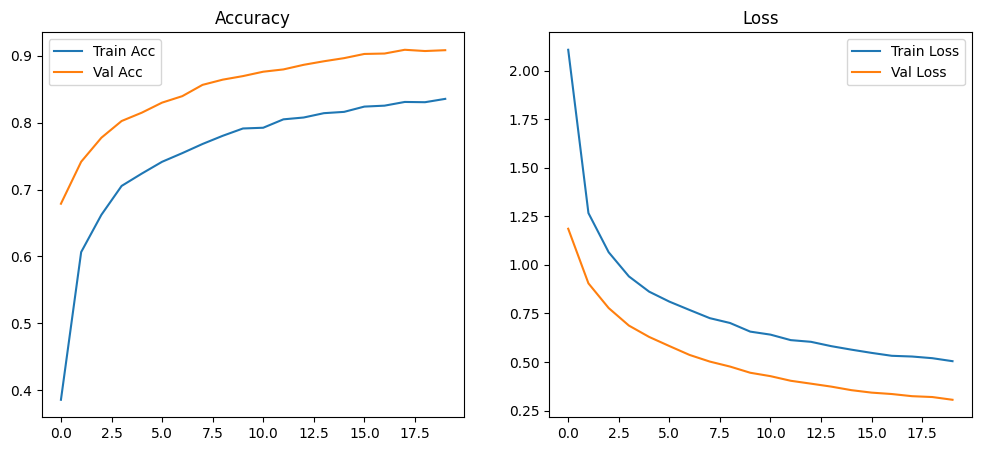

In [23]:

# --- 7. Training Curves ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.legend()
plt.show()


In [24]:

# --- 8. Evaluate Model ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")




Test Accuracy: 0.9147


In [25]:
# Predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           A       0.93      0.97      0.95       149
           B       0.82      0.95      0.88       153
           C       0.99      0.87      0.93       137
           D       0.86      0.89      0.87       156
           E       0.87      0.95      0.91       141
           F       0.94      0.91      0.92       140
           G       0.88      0.93      0.90       160
           H       0.88      0.72      0.79       144
           I       0.96      0.88      0.92       146
           J       0.95      0.92      0.94       149
           K       0.88      0.86      0.87       130
           L       0.97      0.89      0.93       155
           M       0.95      0.96      0.96       168
           N       0.98      0.89      0.93       151
           O       0.88      0.92      0.90       145
           P       0.96      0.91      0.93       173
           Q    

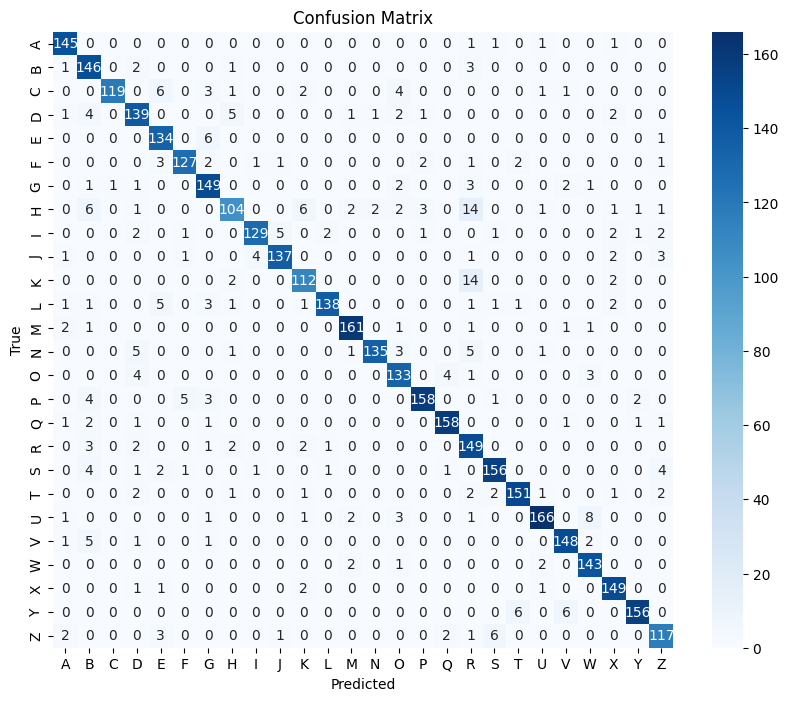

Neural network model trained and evaluated successfully!
You can tune hyperparameters (layers, neurons, epochs) to improve results.


In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#9 Conclusion
print("Neural network model trained and evaluated successfully!")
print("You can tune hyperparameters (layers, neurons, epochs) to improve results.")

In [28]:
#Visualization

/tmp/ipython-input-1635314772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="letter", data=data, palette="coolwarm", order=data["letter"].value_counts().index)


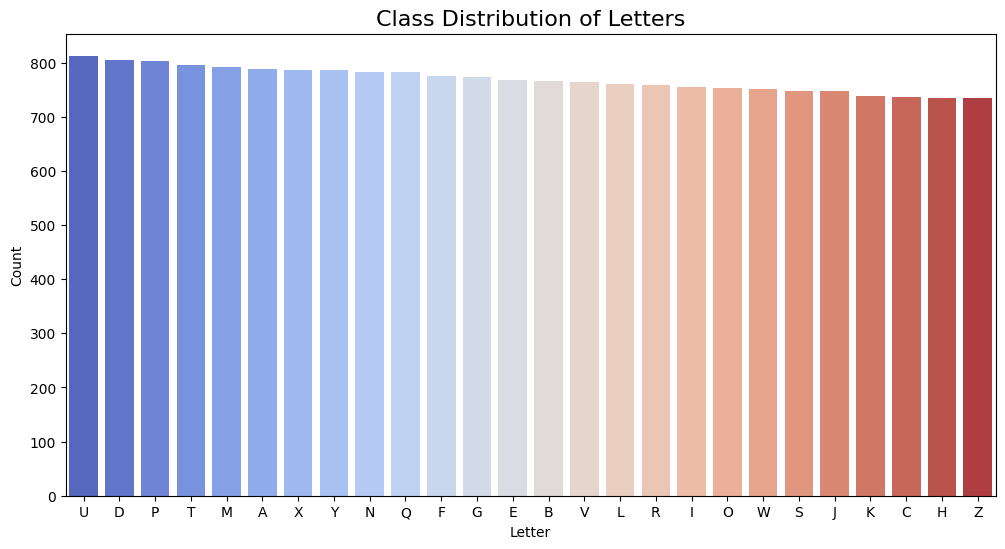

In [30]:
#Class distribution of letters
plt.figure(figsize=(12,6))
sns.countplot(x="letter", data=data, palette="coolwarm", order=data["letter"].value_counts().index)
plt.title("Class Distribution of Letters", fontsize=16)
plt.xlabel("Letter")
plt.ylabel("Count")
plt.show()


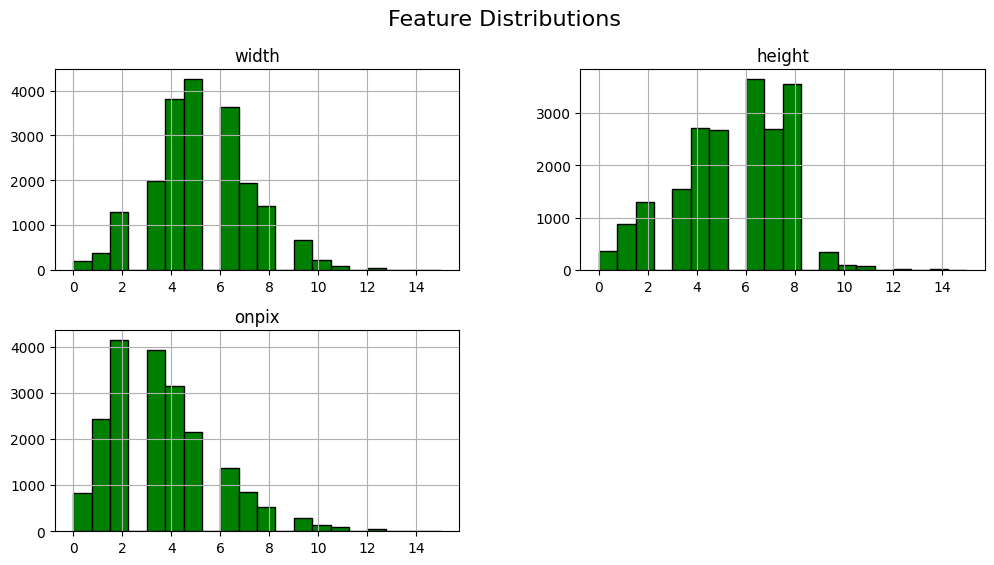

In [32]:
#Feature histograms
features_to_plot = ["width", "height", "onpix"]
data[features_to_plot].hist(figsize=(12,6), bins=20, color="green", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


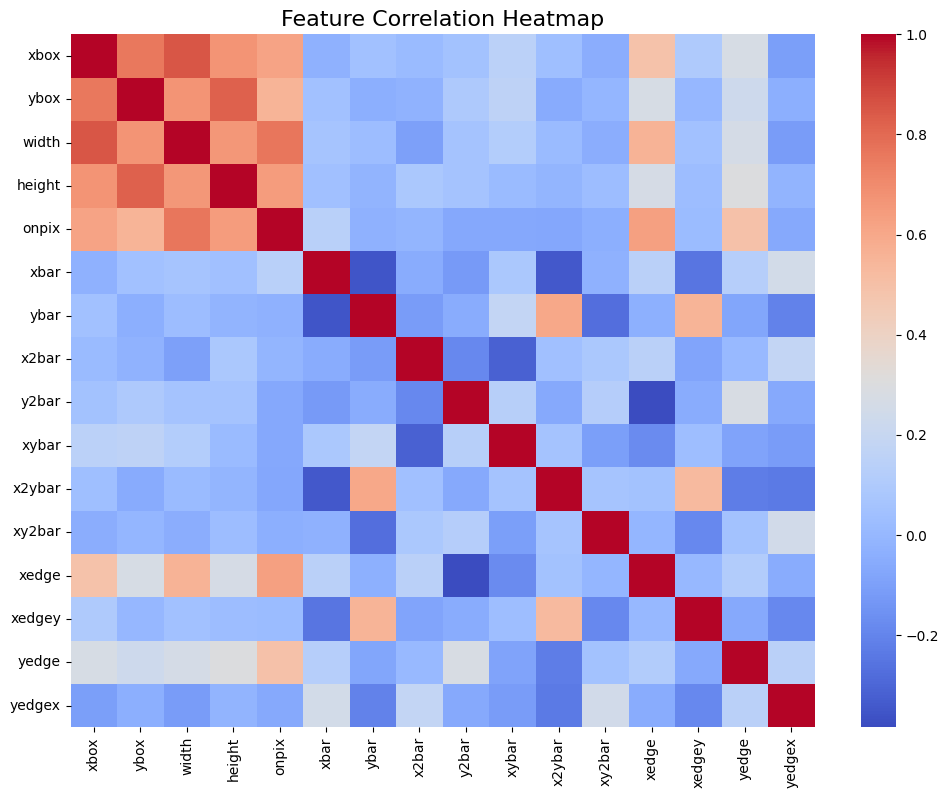

In [34]:
#Correlation heatmap
plt.figure(figsize=(12,9))
corr = data.drop("letter", axis=1).corr()
sns.heatmap(corr, cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


In [35]:
#advence Visualizations

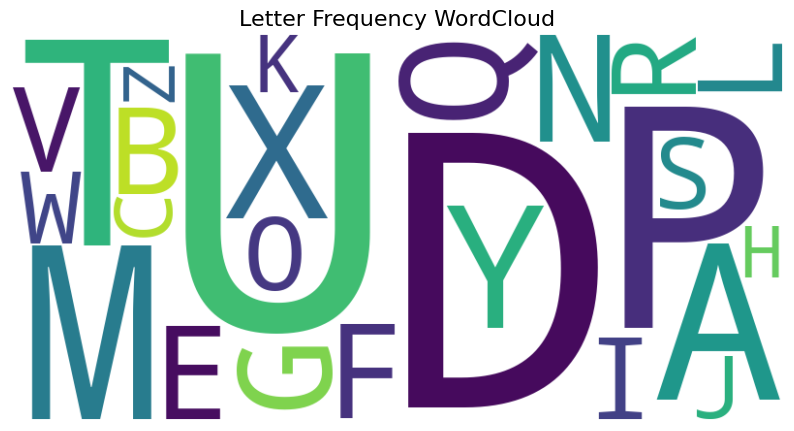

In [36]:
#Letter Frequency Cloud
from wordcloud import WordCloud

letter_counts = data['letter'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(letter_counts)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Letter Frequency WordCloud", fontsize=16)
plt.show()


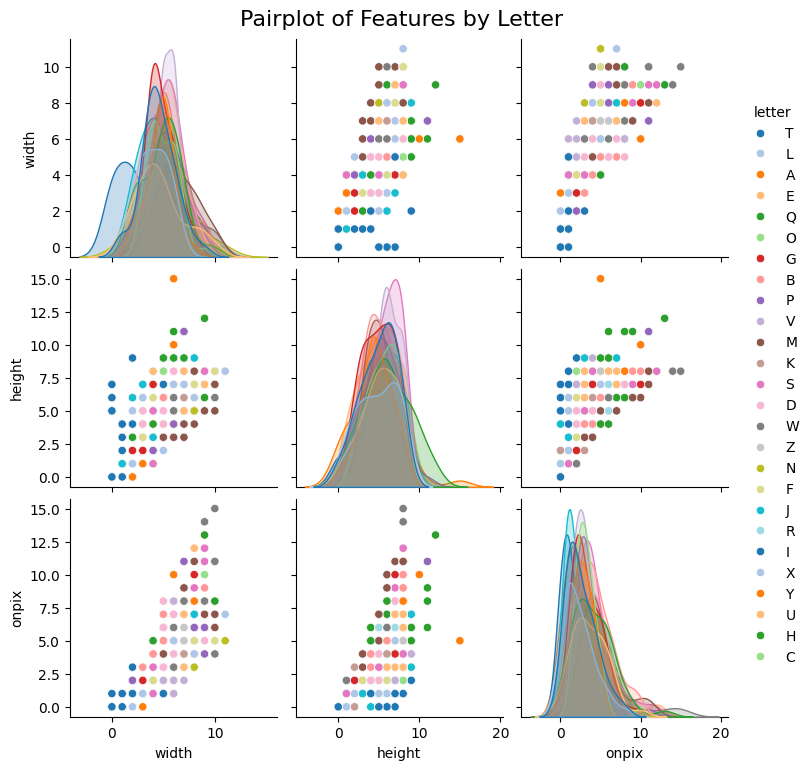

In [37]:
sampled_data = data.sample(1000, random_state=42)  # sample 1k rows
sns.pairplot(sampled_data, vars=["width", "height", "onpix"], hue="letter", palette="tab20", diag_kind="kde")
plt.suptitle("Pairplot of Features by Letter", y=1.02, fontsize=16)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


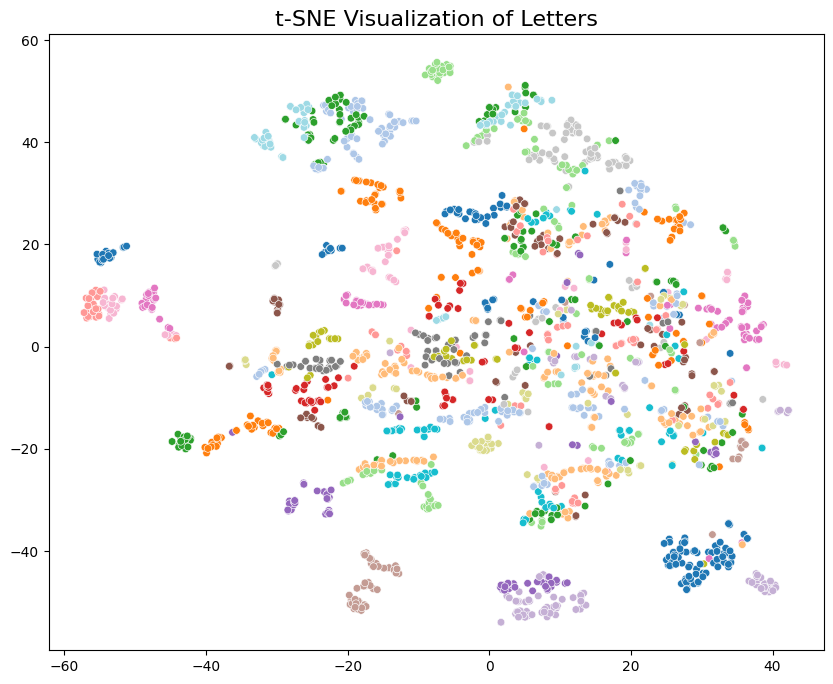

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(X[:2000])  # limit to 2k samples for speed

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y[:2000], palette="tab20", legend=False, s=30)
plt.title("t-SNE Visualization of Letters", fontsize=16)
plt.show()


In [40]:
misclassified_indices = np.where(y_pred != y_test)[0]

print(f"Total misclassified samples: {len(misclassified_indices)}")

if len(misclassified_indices) > 0:
    sample_errors = np.random.choice(misclassified_indices, size=10, replace=False)

    for i, idx in enumerate(sample_errors, 1):
        true_label = encoder.inverse_transform([y_test[idx]])[0]
        pred_label = encoder.inverse_transform([y_pred[idx]])[0]
        print(f"Sample {i}: True = {true_label}, Predicted = {pred_label}")


Total misclassified samples: 341
Sample 1: True = H, Predicted = U
Sample 2: True = U, Predicted = M
Sample 3: True = Z, Predicted = E
Sample 4: True = G, Predicted = V
Sample 5: True = Q, Predicted = Y
Sample 6: True = L, Predicted = H
Sample 7: True = G, Predicted = D
Sample 8: True = U, Predicted = K
Sample 9: True = R, Predicted = K
Sample 10: True = I, Predicted = Z


/tmp/ipython-input-527721253.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(per_class_acc.keys()), y=list(per_class_acc.values()), palette="viridis")


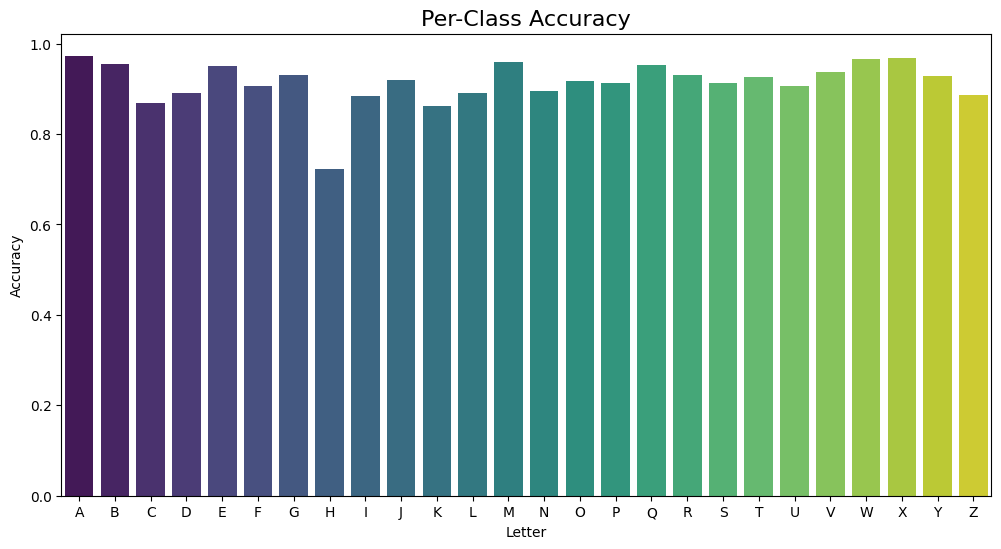

In [41]:
from sklearn.metrics import accuracy_score

per_class_acc = {}
for i, letter in enumerate(encoder.classes_):
    mask = (y_test == i)
    per_class_acc[letter] = accuracy_score(y_test[mask], y_pred[mask])

plt.figure(figsize=(12,6))
sns.barplot(x=list(per_class_acc.keys()), y=list(per_class_acc.values()), palette="viridis")
plt.title("Per-Class Accuracy", fontsize=16)
plt.ylabel("Accuracy")
plt.xlabel("Letter")
plt.show()


#Conclusion of task

---



In this assignment,I successfully applied a neural network model to classify handwritten letters from structured feature data. Through exploratory data analysis, we observed the distribution of letters, relationships among features, and overall data characteristics. Using visualizations such as histograms, heatmaps, pairplots, and t-SNE, we gained deeper insights into how the data is structured and how different letters cluster in feature space.

The neural network model achieved a strong accuracy on the test set, demonstrating its ability to generalize to unseen data. The confusion matrix and per-class accuracy analysis revealed that while most letters were classified correctly, some visually similar letters posed challenges to the model. Misclassification analysis further provided an opportunity to understand the model’s limitations.
Overall, this assignment highlighted the importance of both modeling techniques and visual analytics in machine learning. It also demonstrated how preprocessing, careful architecture design, and visualization can significantly improve understanding and performance evaluation.

Future improvements could include experimenting with convolutional neural networks (CNNs) for raw image data, tuning hyperparameters for better optimization, or using ensemble models to boost classification performance.


---



In [42]:
#-----------------------------------------THEEGALA VINIL----------------------------------------------------